<a href="https://colab.research.google.com/github/paulc00/ML-Intro/blob/master/notebooks/solutions/7_Clustering_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means on digits


## Demo

We'll be using an example from the excellent [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook) by Jake VanderPlas

First we import packages we'll need

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

from scipy.stats import mode

Next we define a function to print a nice graphical  confusion matrix

In [0]:
# Utility function to print a confusion matrix

from sklearn.metrics import confusion_matrix

def print_confusion_matrix(act_labels, pred_labels):
  cm = confusion_matrix(act_labels, pred_labels)
  sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 18}, cmap=sns.color_palette("Blues", 100), cbar=None)
  plt.ylabel('True', fontsize=24)
  plt.xlabel('Predicted', fontsize=24)
  plt.tick_params(axis="x", labelsize=18)
  plt.tick_params(axis="y", labelsize=18)
  plt.plot()

Load our dataset. We're using the handwritten digits data.

In [3]:
# Load the digits data set
digits = load_digits()
digits.data.shape

(1797, 64)

Now we can take a look at what some of these digits look like. They're stored as a flat 64 element array of grayscale values so we need to reshape the arrays to print the numbers.

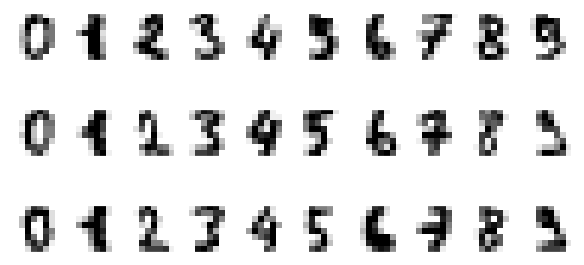

In [4]:
# Plot some example images of the digits
# Cheating a little here, the first 30 are in order
fig, ax = plt.subplots(3, 10, figsize=(10, 5))
num = []
for i, axi in enumerate(ax.flat):
  axi.set(xticks=[], yticks=[])
  axi.imshow(digits.data[i].reshape((8, 8)), interpolation='nearest', cmap=plt.cm.binary)

We'll learn 10 clusters using k-means. Once we've learned the clusters we can label the cluster with the most common label for the points within it.

In [0]:
# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

# Permute the labels
# Get the correct label based on the most common labels within each cluster
clabels = np.zeros(10)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    label = mode(digits.target[mask])[0]
    labels[mask] = label
    clabels[i] = label

Let's take a look at our results.

Accuracy: 79.35%




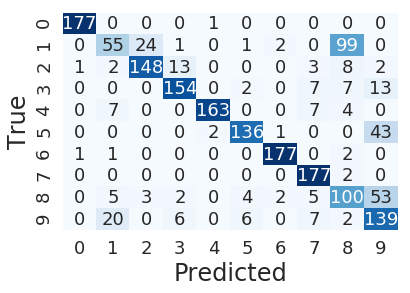

In [6]:
# Compute the accuracy
print(f"Accuracy: {accuracy_score(digits.target, labels)*100:.2f}%\n\n")

# Show the confusion matrix
print_confusion_matrix(digits.target, labels)

It would be difficult to visualize the unprojected clusters because they are in 64 dimensions.

The accuracy is not great on this. The confusion matrix shows that the algorithm mixes 8 and 1 up badly. We're going to need to try something else to improve the quality of the clustering.

## Exercise

We'll use T-SNE to perform dimensionality reduction, moving the image data from 64 dimensions to just 2. As well as allowing us to easily visualize the digits it will significantly improve the clustering results. We could use PCA but T-SNE is more effective in this case.

Create a T-SNE instance, set the random_state parameter to 0. Use the `fit_transform()` method to transform the digit features.

In [0]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
# But it will result in very significantly increased accuracy

# Create a T-SNE instance using the TSNE class we imported above
# tsne = ...
tsne = TSNE(n_components=2, init='random', random_state=0)
# Use the tsne instance to fit and transform the features
# digits_proj = ...
digits_proj = tsne.fit_transform(digits.data)

We run k-means to assign our digits to clusters and pick the most common label as the label for the cluster. You'll need to replace `digits.data` with `digits_proj` but you'll be using `digits.target` for labels, as before.

In [0]:
# Compute the clusters
# kmeans = ...
# clusters = ...
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels (same as before)
# labels = ...
# for ...
# ...
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Show some results.

Accuracy: 93.27%




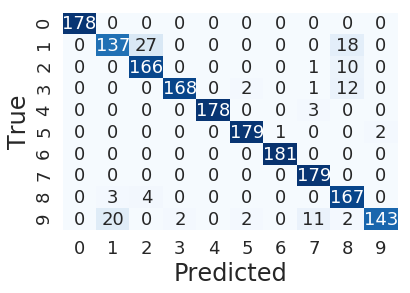

In [9]:
# Compute the accuracy
# print(f"...
print(f"Accuracy: {accuracy_score(digits.target, labels)*100:.2f}%\n\n")

# Show the confusion matrix
# print_c...
print_confusion_matrix(digits.target, labels)

Our accuracy looks much better now and there's much less confusion.

Let's visualize your results, Since they're now in 2-D.

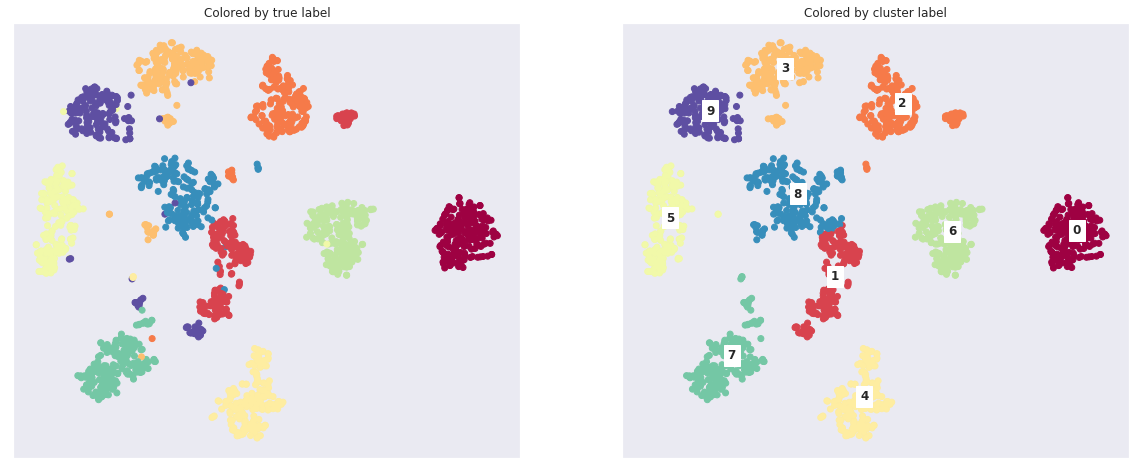

In [10]:
# Plot the 2-D projection of our clusters (if tsne has been defined)
if 'tsne' in globals():
  cm = 'Spectral'
  fig, ax = plt.subplots(1, 2, figsize=(20,8))
  # Color each point based on its cluster label
  ax[0].scatter(digits_proj[:, 0], digits_proj[:, 1], c=digits.target, cmap=cm)
  ax[0].set_xticks([])
  ax[0].set_yticks([])
  ax[0].set_title('Colored by true label')
  # Color each point based on its cluster label
  ax[1].scatter(digits_proj[:, 0], digits_proj[:, 1], c=labels, cmap=cm)
  for digit in range(10):
    i = np.where(labels == digit)[0][0]
    c = kmeans.cluster_centers_[np.argmin(np.linalg.norm(kmeans.cluster_centers_ - digits_proj[i], axis=1))]
    ax[1].text(c[0], c[1], str(digit), {'backgroundcolor': 'white', 'weight': 'bold', 'size': 12, })
  ax[1].set_xticks([])
  ax[1].set_yticks([])
  ax[1].set_title('Colored by cluster label')